<a href="https://colab.research.google.com/github/alexandrajaber/DS_Project1/blob/master/DS_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploring the Data

To get a better understanding of the data, I will be exploring the dataset by looking at the characteristics

#### Importing the data and the relevant libraries

In [1]:
# Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

# Read the data

wine_150k = pd.read_csv('winemag-data_first150k.csv',index_col=0) # Read original dataset 
wine_130k = pd.read_csv('winemag-data-130k-v2.csv',index_col=0) # Read additional dataset with additional columns with the title of each review, the tasters name, and the taster's Twitter handle. Allows to fix duplicate issue.
df= pd.concat([wine_150k,wine_130k],axis=0, sort=True) #Concatenate both datasets into 1 which will be used for further analysis
print("Number of rows and columns:",df.shape) # Shows number of rows and columns of the compelte dataset

df.head() #Prints sample of the full dataset

Number of rows and columns: (280901, 13)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,NaN,NaN,NaN,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,NaN,NaN,NaN,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,NaN,NaN,NaN,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,NaN,NaN,NaN,Provence red blend,Domaine de la Bégude


#### Data Exploration and Cleansing

In [2]:
#Get a description of each column

df.describe(include='all',).T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,280833,50,US,116901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,280901,169430,A little bit funky and unsettled when you pop ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,197701,47239,Reserve,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,280901,NaN,NaN,NaN,88.1469,3.15153,80,86,88,90,100
price,258210,NaN,NaN,NaN,34.1772,38.6117,4,16,25,40,3300
province,280833,490,California,80755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,234594,1332,Napa Valley,10689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,111464,18,Central Coast,24122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,98758,15,@vossroger,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Rename columns into more readable and clear titles

df.columns = ['Country', 'Discription','Designation','Points','Price','Province','Region','Sub-Region','Taster Name','Taster Twitter','Wine Name','Variety','Winery']


In [4]:
# Checking columns that have been renamed

df.columns

Index(['Country', 'Discription', 'Designation', 'Points', 'Price', 'Province',
       'Region', 'Sub-Region', 'Taster Name', 'Taster Twitter', 'Wine Name',
       'Variety', 'Winery'],
      dtype='object')

In [5]:
# Number of rows and columns again

df.shape

(280901, 13)

In [6]:
# Columns with 0 missing values

no_nulls = set(df.columns[df.isnull().mean()==0]) # Assign columns with no missing fields to a variable
print(no_nulls) # print name of rows with no missing values

{'Winery', 'Discription', 'Points'}


In [7]:
# Columns with % of missing values

missing_cols_75 = df.isnull().mean()>0.75 # Assign columns with more than 75% missing fields to a variable
print(missing_cols_75) # print name of rows with more than 75% missing values


Country           False
Discription       False
Designation       False
Points            False
Price             False
Province          False
Region            False
Sub-Region        False
Taster Name       False
Taster Twitter    False
Wine Name         False
Variety           False
Winery            False
dtype: bool


In [8]:
# More than 50%

missing_cols_50 = df.isnull().mean()>0.50  # Assign columns with more than 50% missing fields to a variable
print(missing_cols_50) # print name of rows with more than 50% missing values


Country           False
Discription       False
Designation       False
Points            False
Price             False
Province          False
Region            False
Sub-Region         True
Taster Name        True
Taster Twitter     True
Wine Name          True
Variety           False
Winery            False
dtype: bool


In [9]:
# More than 25%

missing_cols_25 = df.isnull().mean()>0.25 # Assign columns with more than 25% missing fields to a variable
print(missing_cols_25) # print name of rows with more than 25% missing values

Country           False
Discription       False
Designation        True
Points            False
Price             False
Province          False
Region            False
Sub-Region         True
Taster Name        True
Taster Twitter     True
Wine Name          True
Variety           False
Winery            False
dtype: bool


In [10]:
# Number of NANs for each column

count_nulls=df.isnull().sum() # Assign a variable to columns that have NaN values
print(count_nulls) # Print number of NaN values for each column

Country               68
Discription            0
Designation        83200
Points                 0
Price              22691
Province              68
Region             46307
Sub-Region        169437
Taster Name       177174
Taster Twitter    182143
Wine Name         150930
Variety                1
Winery                 0
dtype: int64


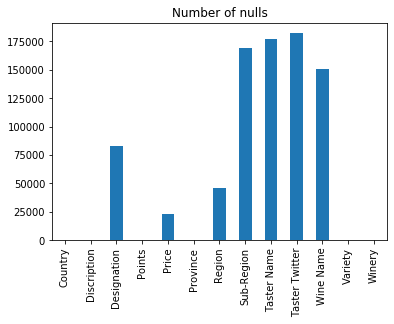

In [11]:
# Bar chart showing the number of nulls in each column

(count_nulls).plot(kind="bar"); # Plot bar chart with count of NaNs by column
plt.title("Number of nulls"); # Add title to bar chart

#### Question 1: Rating Analysis

In this section, we conduct a high level analysis to understand the average ratings by country as well as identify the top 10 and bottom 10 countries in terms of wine ratings

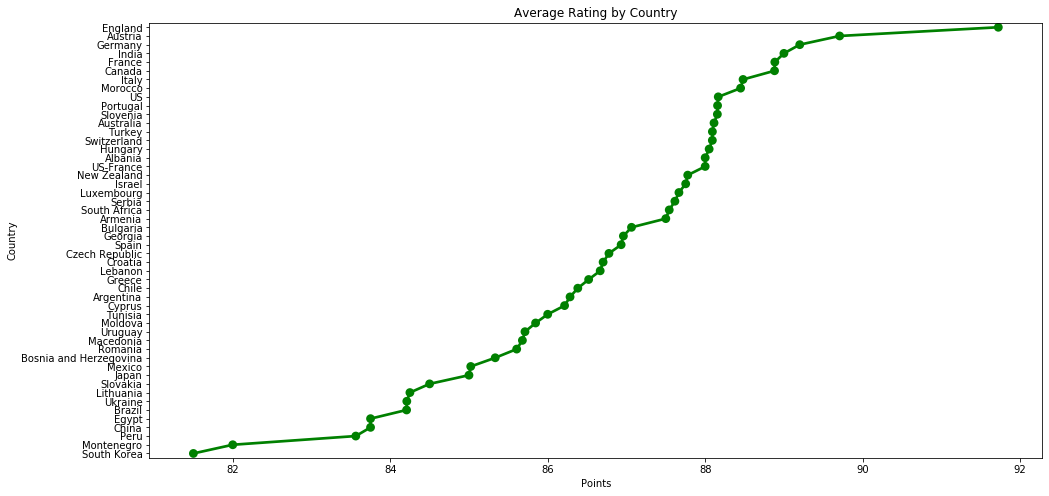

In [12]:
# Calculate and visualise average points by Country

rating_country = df.groupby(['Country',]).mean()['Points'].sort_values(ascending=False).to_frame() # Create a variable that counts average points by country

#Plot average points by country in a line chart
plt.figure(figsize=(16,8)) # Line chart size
sns.pointplot(x = rating_country['Points'] ,y = rating_country.index ,color='g',orient='h') # Line chart measures
plt.title('Average Rating by Country') # Line chart title
plt.xlabel('Points'); # Line chart x label
plt.ylabel('Country'); # Line chart y label

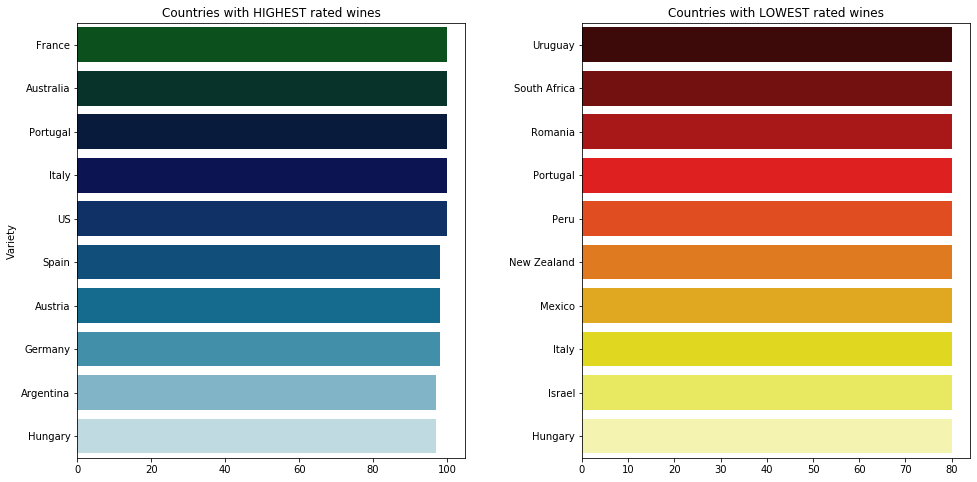

In [13]:
# Plot 2 Bar chart that show the 10 countries with the highest rated wines and the 10 countries with the lowest rated wines

fig,ax = plt.subplots(1,2,figsize=(16,8)) # Create a variable that allows to plot two bar chart side by side 
ax1,ax2 = ax.flatten() # Flattening array to be one dimensional by using iterable unpacking

Most_rated = df.groupby(['Country'])['Points'].max().sort_values(ascending=False).to_frame()[:10] # Variable for top 10 countries with highest ratings
sns.barplot(x = Most_rated['Points'], y = Most_rated.index, palette= 'ocean',ax=ax1) # Plot the highest rated wines variable in a bar chart
ax1.set_title('Countries with HIGHEST rated wines') # Bar chart title
ax1.set_ylabel('Variety') # Y axis label
ax1.set_xlabel('') # X axis label
Least_rated = df.groupby(['Country'])['Points'].min().sort_values(ascending=True).to_frame()[:10] # Variable for top 10 countries with lowest ratings
sns.barplot(x = Least_rated['Points'], y = Least_rated.index, palette = 'hot',ax=ax2) # Plot the lowest rated wines variable in a bar chart
ax2.set_title('Countries with LOWEST rated wines') # Bar chart title
ax2.set_ylabel('') # Y axis label
ax2.set_xlabel('') # X axis label
plt.subplots_adjust(wspace=0.3); # Adjust space between both charts

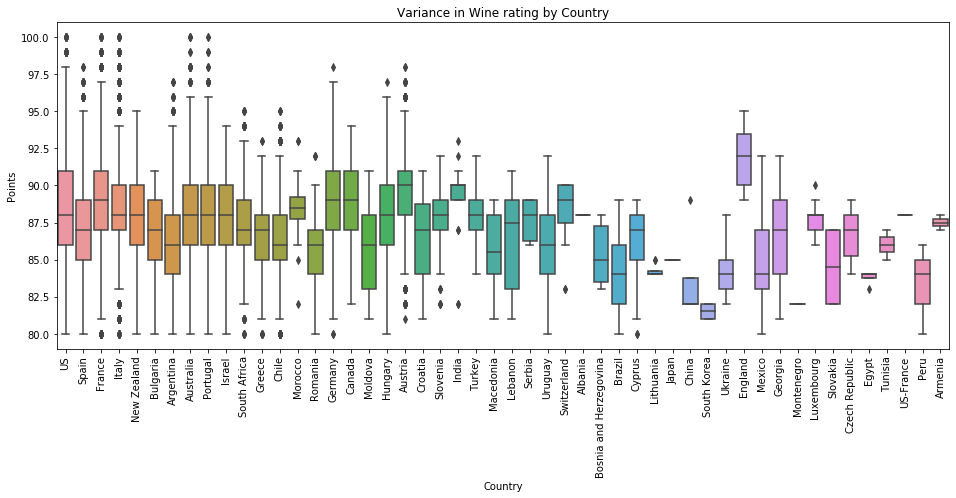

In [14]:
# Plot a boxplot to show the distribution of ratings within each country

plt.figure(figsize=(16,6)) # Define size of boxplot area
sns.boxplot(x = df['Country'], y = df['Points']) # Plotting boxplot showing variance of points by country
plt.title('Variance in Wine rating by Country') # Boxplot title
plt.xticks(rotation=90); # Orientation of boxplot

#### Question 2: Pricing Analysis

In this section, we conduct a high level analysis to understand the average price by country as well as identify the top 10 and bottom 10 countries in terms of wine pricing

Text(0.5, 1.0, 'Boxplot of price')

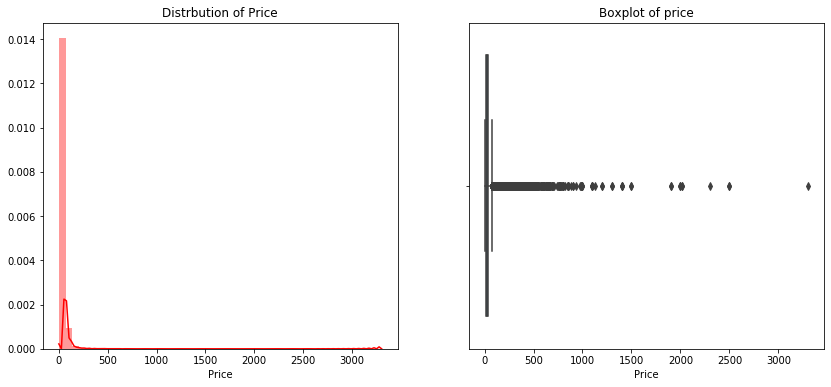

In [15]:
f, ax = plt.subplots(1,2,figsize=(14,6)) # Create a variable that allows to plot two charts side by side
ax1,ax2 = ax.flatten() # Flattening array to be one dimensional by using iterable unpacking
sns.distplot(df['Price'].fillna(df['Price'].mean()),color='r',ax=ax1) # Distribution plot that shows the distribution of wine price
ax1.set_title('Distrbution of Price') # Title for distribution plot
sns.boxplot(x = df['Price'], ax=ax2) # Plot boxplot for price
ax2.set_ylabel('') # X laber
ax2.set_title('Boxplot of price') # Boxplot Title

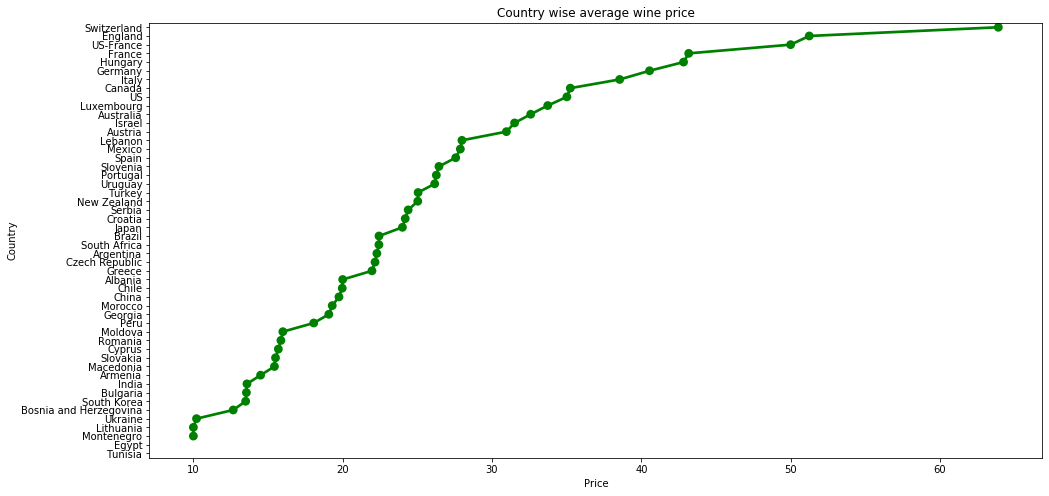

In [16]:
# Calculate and visualise average price by Country

avg_price = df.groupby(['Country',]).mean()['Price'].sort_values(ascending=False).to_frame() # Create a variable that counts average price by country

#Plot average points by country in a line chart
plt.figure(figsize=(16,8)) # Line chart size
sns.pointplot(x = avg_price['Price'] ,y = avg_price.index ,color='g',orient='h',markers='o') # Line chart measures
plt.title('Country wise average wine price') # Line chart title
plt.xlabel('Price') # Line chart x label
plt.ylabel('Country'); # Line chart y label

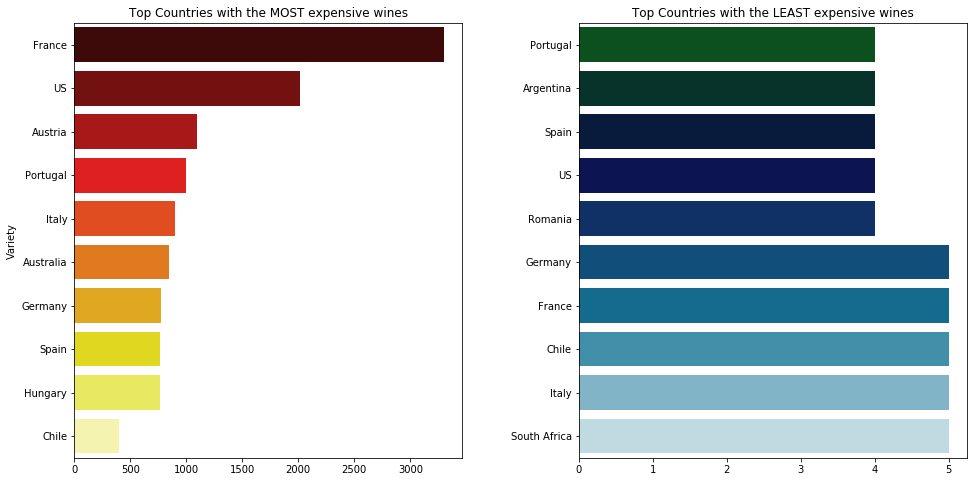

In [17]:
# Plot 2 Bar chart that show the 10 countries with the most expensive wines and the 10 countries with the least expensive wines


fig,ax = plt.subplots(1,2,figsize=(16,8)) # Create a variable that allows to plot two bar chart side by side 
ax1,ax2 = ax.flatten() # Flattening array to be one dimensional by using iterable unpacking

Most_expensive = df.groupby(['Country'])['Price'].max().sort_values(ascending=False).to_frame()[:10] # Variable for top 10 countries with highest prices
sns.barplot(x = Most_expensive['Price'], y = Most_expensive.index, palette= 'hot',ax=ax1) # Plot the highest priced wines variable in a bar chart
ax1.set_title('Top Countries with the MOST expensive wines') # Bar chart title
ax1.set_ylabel('Variety') # y axis label
ax1.set_xlabel('') # x axis label
Least_expensive = df.groupby(['Country'])['Price'].min().sort_values(ascending=True).to_frame()[:10] # Variable for top 10 countries with least expensive prices
sns.barplot(x = Least_expensive['Price'], y = Least_expensive.index, palette = 'ocean',ax=ax2) # Plot the lest expensive  wines variable in a bar chart
ax2.set_title('Top Countries with the LEAST expensive wines') # Bar chart title
ax2.set_ylabel('') # Y axis label
ax2.set_xlabel('') # X axis label
plt.subplots_adjust(wspace=0.3); # Adjust space between both charts

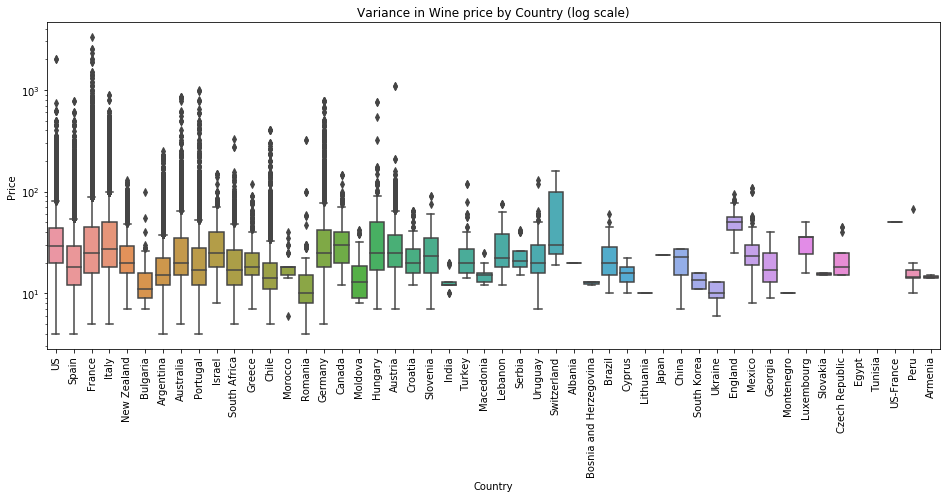

In [18]:
# Plot a boxplot to show the distribution of prices within each country

plt.figure(figsize=(16,6)) # Define size of boxplot area
sns.boxplot(x = df['Country'], y = df['Price']) # Plotting boxplot showing variance of price by country
plt.yscale("log") #Log numbers otherwise the chart will be unreadable due to large scale
plt.title('Variance in Wine price by Country (log scale)') # Boxplot title
plt.xticks(rotation=90); # Orientation of boxplot

#### Question 3: Price and Rating Correlation

In this section we will explore what the correlation is between the price of wines and their ratings.

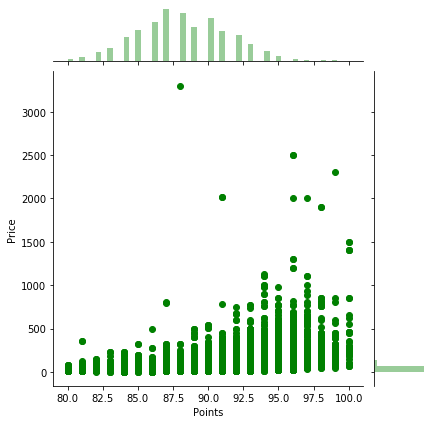

In [19]:
# Plots scatter plot of price vs points

sns.jointplot( x = df['Points'],y = df['Price'],color='g'); # Define x axis as points and y axis as price

#### Question 4: Price of wine determinants

In this section we will conduct a linear regression and run it's coefficients to understand which variables have the highest impact on the price of wine

In [0]:
# Uncover the types of columns

df.dtypes

Country            object
Discription        object
Designation        object
Points              int64
Price             float64
Province           object
Region             object
Sub-Region         object
Taster Name        object
Taster Twitter     object
Wine Name          object
Variety            object
Winery             object
dtype: object

In [0]:
# Count the number of categorical variables

categ_df = df.select_dtypes(include=['object'])
categ_df.shape[1]

11

In [0]:
# Number of columns with 0 missing values

np.sum(np.sum(categ_df.isnull())/categ_df.shape[0] == 0) 

2

In [0]:
# Names of columns with 0 missing values

categ_no_nulls = set(categ_df.columns[categ_df.isnull().mean()==0]) 
print(categ_no_nulls)

{'Discription', 'Winery'}


In [0]:
# Number of columns with more than 50% missing values

np.sum(np.sum(categ_df.isnull())/categ_df.shape[0] > 0.5) 

4

In [0]:
# Names of columns with more than 75% missing values

categ_nulls50 = set(categ_df.columns[categ_df.isnull().mean()>0.5]) 
print(categ_nulls50)

{'Taster Name', 'Taster Twitter', 'Sub-Region', 'Wine Name'}


In [0]:
# Number of columns with more than 75% missing values

np.sum(np.sum(categ_df.isnull())/categ_df.shape[0] > 0.75) 

0

In [0]:
df_new=df.drop(['Taster Twitter', 'Taster Name', 'Sub-Region','Discription','Designation','Wine Name','Region','Winery'], axis=1)
df_new.head()
df_new.shape

(280901, 5)

In [0]:
# Columns with null values

set(df_new.columns[df_new.isnull().mean()!=0]) 


{'Country', 'Price', 'Province', 'Variety'}

In [0]:
df_new.dtypes

Country      object
Points        int64
Price       float64
Province     object
Variety      object
dtype: object

In [0]:
 # Drop rows with missing price values

df_model = df_new.dropna(subset=['Price'], axis=0)
y = df_model['Price']

#Drop Price column

df_model = df_model.drop(['Price'], axis=1)


# Dummy the categorical variables

cat_vars = df_model.select_dtypes(include=['object']).copy().columns
X = pd.get_dummies(df_model, columns = cat_vars, sparse='True')

In [0]:
y.shape

(258210,)

In [0]:
X.shape

(258210, 1277)

In [0]:
df_model.columns

Index(['Country', 'Points', 'Province', 'Variety'], dtype='object')

In [0]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [0]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.26843644363351604.  The rsquared on the test data was -5.2313816978432805e+26.


In [0]:
def coef_weights(coefficients, X_train):

    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
724,Variety_Frankovka,-7.243654e+16,7.243654e+16
442,Province_Stirling,-6.700094e+16,6.700094e+16
515,Province_Waitaki Valley,-5.949223e+16,5.949223e+16
825,Variety_Malagouzia-Chardonnay,5.577153e+16,5.577153e+16
248,Province_Kyoto,-5.007256e+16,5.007256e+16
46,Country_US-France,-4.950007e+16,4.950007e+16
802,Variety_Koshu,4.796461e+16,4.796461e+16
965,Variety_Parraleta,-4.552308e+16,4.552308e+16
585,Variety_Blauburger,-4.468435e+16,4.468435e+16
610,Variety_Cabernet Franc-Tempranillo,-4.398576e+16,4.398576e+16
